PYTN-KS16-KELOMPOK 4

* Andhar Siraj Munir
* M. Rizqi Yuwanto
* M. Sadam Abdillah



# 1. PERKENALAN

## 1.1. Latar Belakang

Uber dan Lyft adalah perusahaan layanan transportasi berbasis aplikasi yang menawarkan jasa antar jemput penumpang menggunakan mobil pribadi. Kedua perusahaan ini memiliki persaingan yang sangat ketat dalam industri transportasi online. Di Amerika Serikat, Uber dan Lyft merupakan dua pemain utama dalam bisnis ride-hailing (aplikasi penyedia layanan transportasi).

Pada awalnya, Uber didirikan pada tahun 2009 dan menjadi perusahaan ride-hailing pertama yang berhasil mendobrak pasar dengan konsep yang revolusioner. Kemudian, Lyft didirikan pada tahun 2012 sebagai pesaing utama Uber di pasar Amerika Serikat. Kedua perusahaan ini menyediakan layanan yang serupa, yaitu mempertemukan pengemudi dan penumpang menggunakan aplikasi smartphone.

Namun, meskipun memiliki konsep yang serupa, Uber dan Lyft memiliki beberapa perbedaan yang cukup signifikan. Uber memiliki cakupan yang lebih luas dan lebih populer di seluruh dunia. Sedangkan Lyft, memiliki fokus pada pasar domestik Amerika Serikat dan seringkali menawarkan harga yang lebih murah dibandingkan Uber.

Dalam analisis menggunakan konsep regression, kita dapat menggunakan variabel-variabel seperti lokasi, waktu, tarif, jumlah pengemudi dan penumpang, serta penawaran promosi yang ditawarkan oleh kedua perusahaan. Dengan membandingkan data dari kedua perusahaan ini, kita dapat mengetahui faktor-faktor apa saja yang mempengaruhi jumlah pengemudi dan penumpang, dan juga bagaimana faktor-faktor tersebut berdampak pada pendapatan perusahaan. Dengan begitu, kita dapat mengetahui persaingan kedua perusahaan dan juga strategi yang dapat diambil untuk meningkatkan performa bisnis.

## 1.2. Dataset

Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Uber vs Lyft](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Dataset Uber & Lyft ini berisi 693071 baris dan 57 kolom yang 10 diantaranya paling relevan. Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor.

## 1.3. Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai antara lain:

*   Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi tarif harga Taksi Online.
*   Dapat memprediksi tarif harga Taksi Online berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode regresi linier.



# 2. IMPORT PUSTAKA

In [2]:
# for dataframe
import pandas as pd
import numpy as np

import json

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# for data exploration
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# for analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# for ignove warning
import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

## 3.1. Load Data

Upload kaggle token API sesuai akun masing-masing

In [3]:
# Define your Kaggle API credentials
kaggle_credentials = {
    "username": "andharsm",
    "key": "aa01adb9e93691614d246ac084458990"
}

# Save the credentials to a file named kaggle.json
with open('/content/kaggle.json', 'w') as file:
    json.dump(kaggle_credentials, file)

Konfigurasi kaggle

In [4]:
# Move the file to the appropriate directory
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download dataset yang dibutuhkan

In [5]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 92% 41.0M/44.5M [00:00<00:00, 88.1MB/s]
100% 44.5M/44.5M [00:00<00:00, 78.0MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('uber-and-lyft-dataset-boston-ma.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import pandas as pd
data = pd.read_csv('/content/rideshare_kaggle.csv')

data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## 3.2. Ekspolarasi Data

Menampilkan 5 data teratas

In [ ]:
df = pd.DataFrame(data)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Menampilkan 5 data terakhir

In [ ]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Menampilkan dimensi dataset

In [ ]:
df.shape

(693071, 57)

Terdapat 693071 baris dan 57 kolom pada dataset.

Menampilkan informasi detail

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari informasi diatas terdapat 29 type data float, 17 type data integer, dan 11 type data object.

Menampilkan nama-nama kolom pada dataset

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Menampilkan ringkasan statistik dari kolom data numerik

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Menampilkan ringkasan statistik dari kolom data kategorikal

In [ ]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


Menampilkan nilai unik setiap kolom

In [ ]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Menampilkan missing value pada dataset

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in df.columns:  # Mengganti 'df' dengan nama DataFrame Anda
    for nilai in df[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: set()


Menampilkan data duplikat

In [ ]:
df.duplicated().sum()

0

# 4. DATA CLEANING

Menampilkan jumlah missing value dari kolom 'price'

In [ ]:
df['price'].isnull().sum()

55095

Menghitung presentase data miss pada kolom price terhadap banyaknya data

In [ ]:
print(df['price'].isnull().sum()/df.shape[0]*100)

7.949402009317949


Terdapat 7.95% data null pada kolom 'price'. Dikarenakan kurang dari 20% maka sebaiknya data tersebut di drop

In [ ]:
df = df.drop(df[df['price'].isnull()].index)

Menampilkan dimensi setelah drop

In [ ]:
df.shape

(637976, 57)

Dataset awal 693071 baris berubah menjadi 637976 baris

Memastikan sudah tidak ada missing data

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Sudah tidak ada data kosong, data duplikat atau kesalahan tipe data

# 5. Data Visualization

## 5.1 Distribusi Cab_type

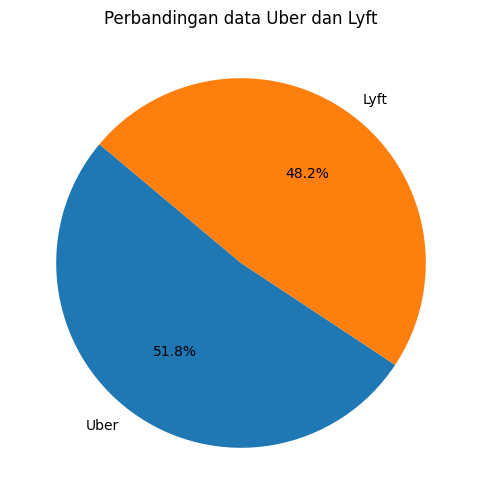

In [ ]:
unique_cab_type = df['cab_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(unique_cab_type, labels=unique_cab_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan data Uber dan Lyft')
plt.show()

# df[df['cab_type']=='Lyft'].sum()

# plt.pie(df['cab_type'])
# plt.show()

Dari total dataset, Uber memiliki presentase tertinggi yaitu 51.8% dan Lyft 48.2%

## 5.2. Distribusi Harga terhadap Cab_type

In [ ]:
price = df['price']
price_uber = df[df['cab_type']=='Uber']['price']
price_lyft = df[df['cab_type']=='Lyft']['price']

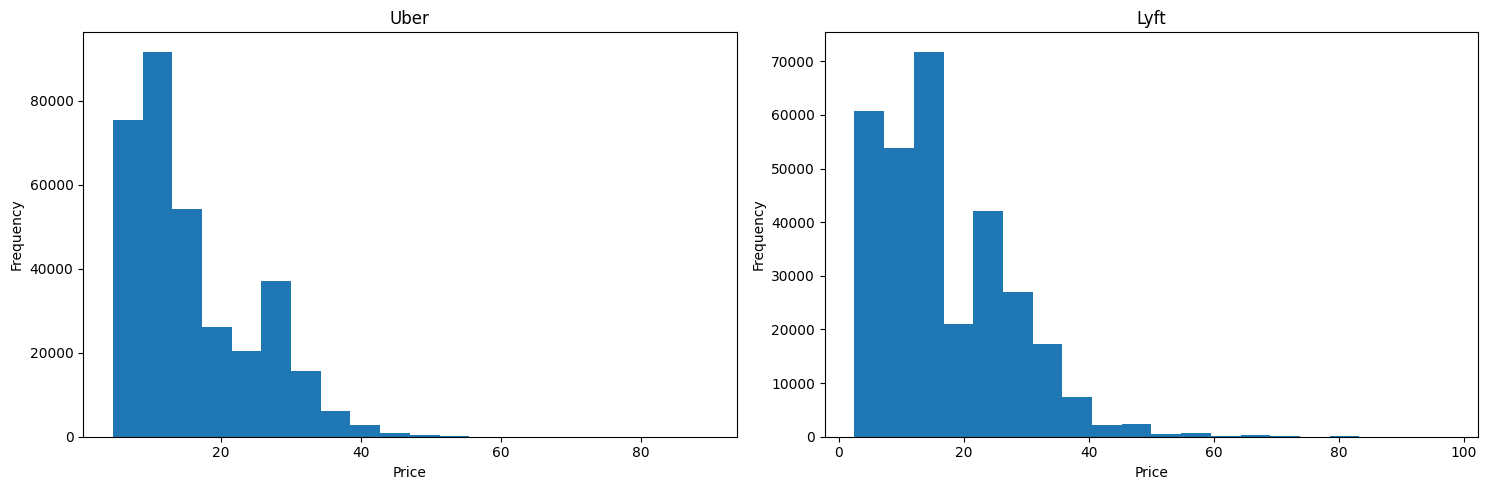

In [ ]:
# Buat tiga subplot dengan tiga kolom
plt.figure(figsize=(15, 5))

# Subplot 1 - Histogram untuk harga Uber
plt.subplot(1, 2, 1)
plt.hist(price_uber, bins=20)
plt.title('Uber')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Subplot 2 - Histogram untuk harga Lyft
plt.subplot(1, 2, 2)
plt.hist(price_lyft, bins=20)
plt.title('Lyft')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Tampilkan plot
plt.tight_layout()
plt.show()


Histogram diatas menggambarkan distribusi data harga / tarif terhadap cab type Uber, Lyft dan keseluruhan.

Pada Uber, distribusi harga memiliki puncak dibawah 20 dolar dengan frekuensi lebih dari 80000 kali

Pada Lyft, distribusi harga memiliki puncak dibawah 20 dolar dengan frekuensi lebih dari 70000 kali.

Dapat disimpulkan bahwa tarif yang paling banyak dibayarkan adalah dibawah 20000 dolar

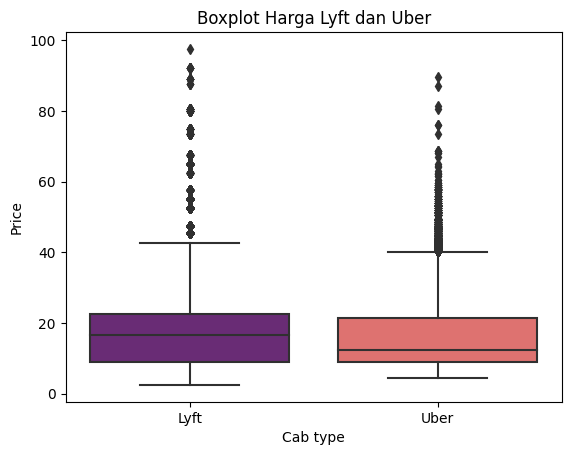

Q1 Price Lyft: 9.0
Q3 Price Lyft: 22.5
Median Price Lyft: 16.5

Q1 Price Uber: 9.0
Q3 Price Uber: 21.5
Median Price Uber: 12.5


In [ ]:
# fig, ax = plt.subplots(figsize=(7, 5))

# Buat box plot
sns.boxplot(x='cab_type', y='price', data=df, palette='magma')

plt.xlabel("Cab type")
plt.ylabel("Price")
plt.title("Boxplot Harga Lyft dan Uber")

plt.show()

# Tambahkan label Q1 dan Q3 secara manual
q1_lyft = np.percentile(price_lyft, 25)
q3_lyft = np.percentile(price_lyft, 75)
# Hitung median dari price_lyft
median_lyft= np.median(price_lyft)
print(f'Q1 Price Lyft: {q1_lyft}')
print(f'Q3 Price Lyft: {q3_lyft}')
print(f'Median Price Lyft: {median_lyft}')

print()

q1_uber = np.percentile(price_uber, 25)
q3_uber = np.percentile(price_uber, 75)
median_uber = np.median(price_uber)
print(f'Q1 Price Uber: {q1_uber}')
print(f'Q3 Price Uber: {q3_uber}')
print(f'Median Price Uber: {median_uber}')


Dari boxplot diatas menunjukan bahwa Lyft maupun Uber memiliki Q1 yang sama, yaitu 9.0, menunjukkan bahwa 25% data terendah dari kedua layanan memiliki harga yang serupa.

Quartile ketiga (Q3) Lyft (22.5) sedikit lebih tinggi dari Q3 Uber (21.5), menunjukkan bahwa sekitar 25% data tertinggi Lyft memiliki harga yang sedikit lebih tinggi daripada Uber.

Median Lyft (16.5) lebih tinggi dari median Uber (12.5), yang menunjukkan bahwa harga tengah atau "harga tipikal" dalam data Lyft lebih tinggi daripada Uber.

Terdapat banyak data outlier diatas Q3

## 5.3. Distribusi Distances terhadap Cab_type

In [ ]:
distances = df['distance']
distances_uber = df[df['cab_type']=='Uber']['distance']
distances_lyft = df[df['cab_type']=='Lyft']['distance']

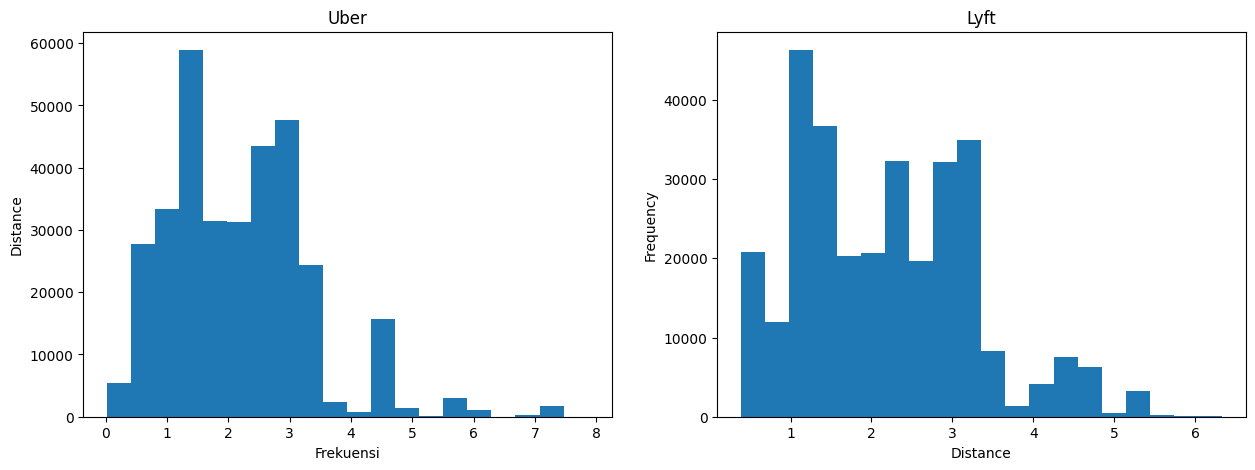

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(distances_uber, bins=20)
plt.xlabel('Frekuensi')
plt.ylabel('Distance')
plt.title('Uber')

plt.subplot(1,2,2)
plt.hist(distances_lyft, bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Lyft')

plt.show()


Dari histogram diatas dapat dilihat puncaknya terdapat pada jarak 1 sampai 2 mil

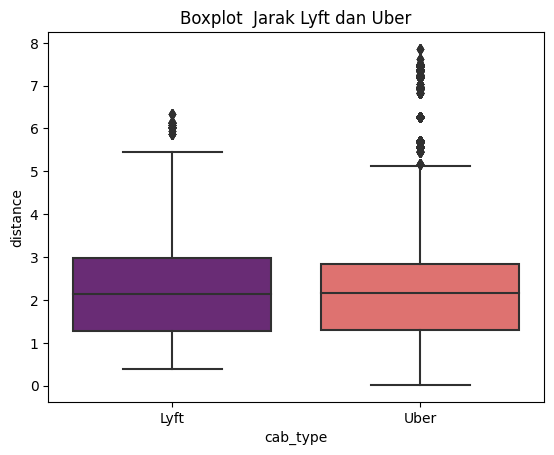

Q1 Distance Lyft: 1.27
Q3 Distance Lyft: 2.97
Median Distance Lyft: 2.14

Q1 Distance uber: 1.3
Q3 Distance uber: 2.84
Median Distance uber: 2.17


In [ ]:
sns.boxplot(x='cab_type', y='distance', data=df, palette='magma')

plt.xlabel('cab_type')
plt.ylabel('distance')
plt.title('Boxplot  Jarak Lyft dan Uber')

plt.show()

q1_lyft = np.percentile(distances_lyft, 25)
q3_lyft = np.percentile(distances_lyft, 75)
median_lyft = np.median(distances_lyft)
print(f'Q1 Distance Lyft: {q1_lyft}')
print(f'Q3 Distance Lyft: {q3_lyft}')
print(f'Median Distance Lyft: {median_lyft}')

print()

q1_uber = np.percentile(distances_uber, 25)
q3_uber = np.percentile(distances_uber, 75)
median_uber = np.median(distances_uber)
print(f'Q1 Distance uber: {q1_uber}')
print(f'Q3 Distance uber: {q3_uber}')
print(f'Median Distance uber: {median_uber}')

Quartile Pertama (Q1) Distance Uber adalah 1.3. Ini berarti 25% data terendah dari layanan Uber memiliki jarak kurang dari atau sama dengan 1.3 mil.

Quartile Ketiga (Q3) Distance Uber adalah 2.84. Ini menunjukkan bahwa 25% data tertinggi dari layanan Uber memiliki jarak kurang dari atau sama dengan 2.84 mil.

Median (Q2) Distance Uber adalah 2.17. Median adalah nilai tengah dalam data jarak Uber. Ini berarti 50% data memiliki jarak kurang dari atau sama dengan 2.17 mil, dan 50% sisanya memiliki jarak lebih besar dari 2.17 mil.

## 5.4. Distribusi Hour terhadap Cab_type

In [ ]:
hours = df['hour'].sort_values(ascending=True)
hours_uber = df[df['cab_type']=='Uber']['hour'].sort_values(ascending=True)
hours_lyft = df[df['cab_type']=='Lyft']['hour'].sort_values(ascending=True)

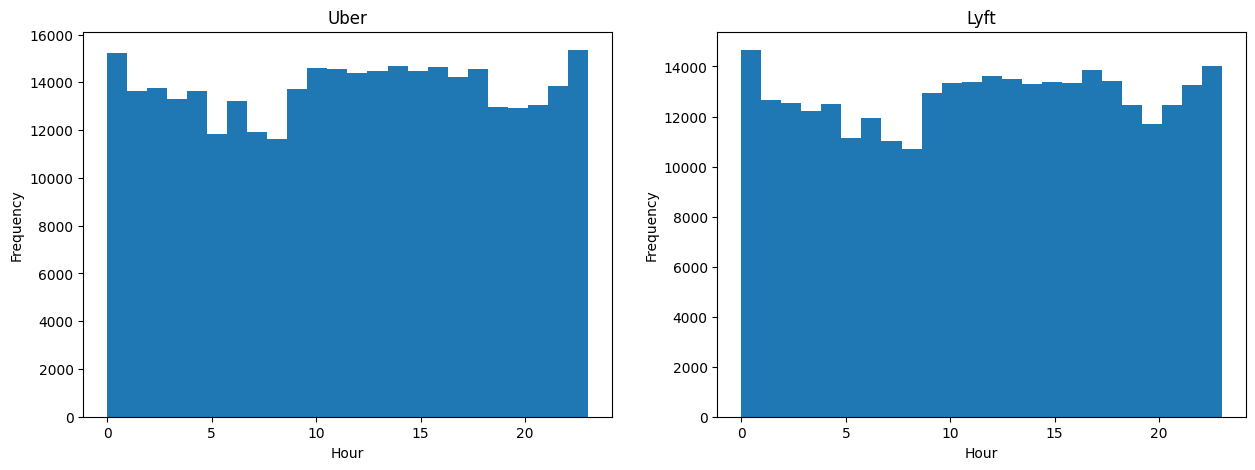

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(hours_uber, bins=24)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Uber')

plt.subplot(1,2,2)
plt.hist(hours_lyft, bins=24)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Lyft')

plt.show()

Dari histogram diatas dengan bins 24 dikaranakan terdapat data hingga 24 jam, ditampilkan bahwa Uber dan Lyft memiliki dua puncak data yaitu jam 00 dan 23 waktu setempat

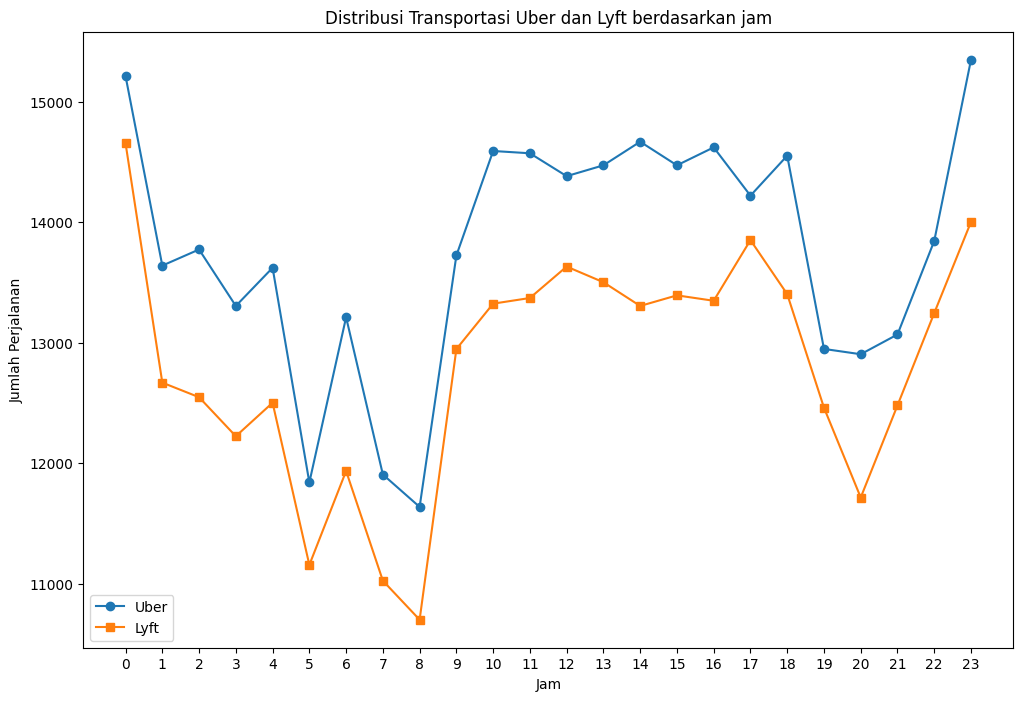

In [ ]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(12, 8))

# Menghitung jumlah perjalanan setiap jam untuk Uber dan Lyft
uber_count = hours_uber.value_counts().sort_index()
lyft_count = hours_lyft.value_counts().sort_index()

# Plot data menggunakan variabel yang telah dibuat
ax.plot(uber_count.index, uber_count, label="Uber", marker='o')
ax.plot(lyft_count.index, lyft_count, label="Lyft", marker='s')

# Menambahkan label dan judul
ax.set(xlabel="Jam", ylabel="Jumlah Perjalanan", title="Distribusi Transportasi Uber dan Lyft berdasarkan jam")

# Menampilkan legenda
ax.legend()

# Menentukan interval tick sumbu x
ax.set_xticks(range(0, 24))

# Menampilkan grafik
plt.show()

Dari grafik diatas terlihat bahwa Uber dan Lyft paling banyak digunakan pada tengah malam (00.00) dan paling sedikit digunakan pada pukul 8 pagi

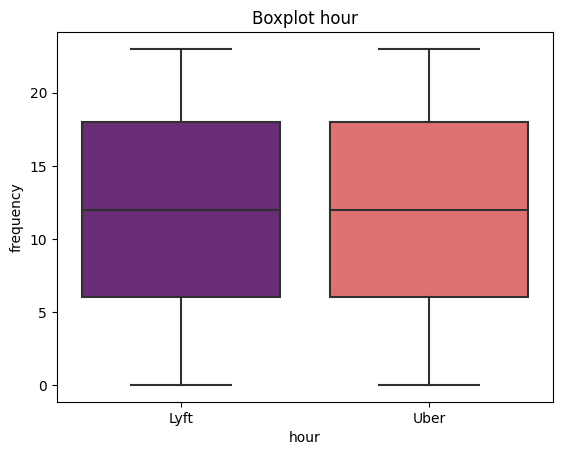

Q1 hour Lyft: 6.0
Q3 hour Lyft: 18.0
Median hour Lyft: 12.0

Q1 hour uber: 6.0
Q3 hour uber: 18.0
Median hour uber: 12.0


In [ ]:
sns.boxplot(x='cab_type', y='hour', data=df, palette='magma')

plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('Boxplot hour')

plt.show()

q1_lyft = np.percentile(hours_lyft, 25)
q3_lyft = np.percentile(hours_lyft, 75)
median_lyft = np.median(hours_lyft)
print(f'Q1 hour Lyft: {q1_lyft}')
print(f'Q3 hour Lyft: {q3_lyft}')
print(f'Median hour Lyft: {median_lyft}')

print()

q1_uber = np.percentile(hours_uber, 25)
q3_uber = np.percentile(hours_uber, 75)
median_uber = np.median(hours_uber)
print(f'Q1 hour uber: {q1_uber}')
print(f'Q3 hour uber: {q3_uber}')
print(f'Median hour uber: {median_uber}')

Baik Lyft maupun Uber memiliki Q1 yang sama (6.0), menunjukkan bahwa 25% data jam terendah dari keduanya adalah sekitar pukul 6.0.

Quartile ketiga (Q3) Lyft (18.0) sama dengan quartile ketiga (Q3) Uber (18.0), yang menunjukkan bahwa sekitar 25% data jam tertinggi dari kedua layanan adalah sekitar pukul 18.0.

Median Lyft (12.0) sama dengan median Uber (12.0), yang berarti jam tengah atau "jam tipikal" dari kedua layanan adalah sekitar pukul 12.0.

## 5.5. Distribusi Asal dan Tujun

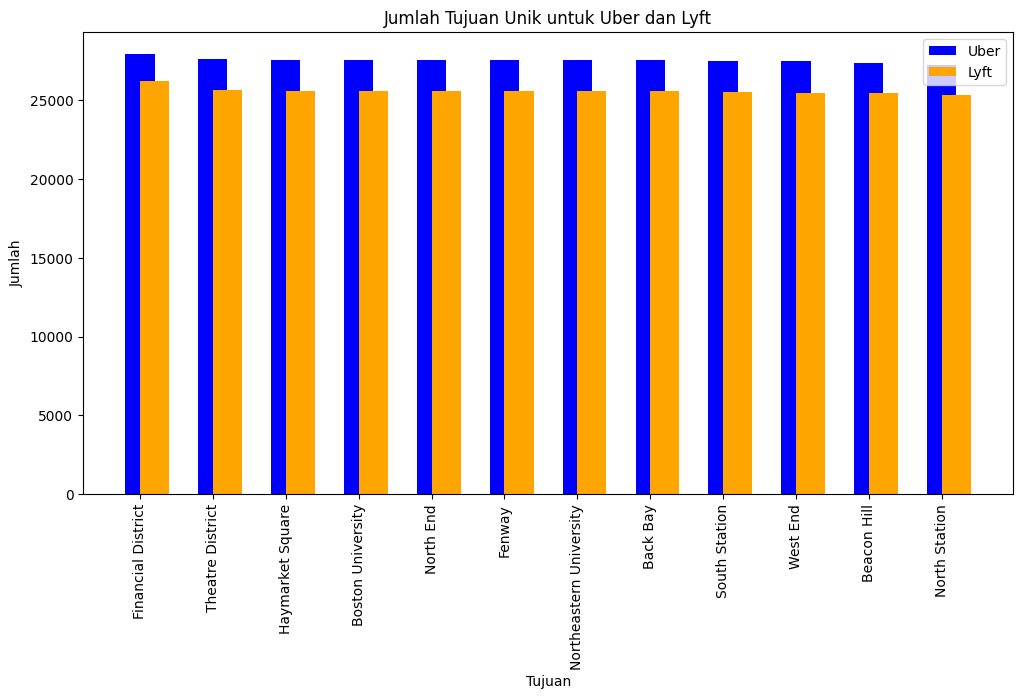

In [ ]:
# Filter data untuk Uber dan Lyft
uber_data = df[df['cab_type'] == 'Uber']
lyft_data = df[df['cab_type'] == 'Lyft']

# Menghitung jumlah tujuan unik untuk Uber dan Lyft
uber_destinations = uber_data['destination'].value_counts()
lyft_destinations = lyft_data['destination'].value_counts()

# Menyiapkan data untuk plot
tujuan = uber_destinations.index  # Ambil nama tujuan dari salah satu data (bisa Uber atau Lyft)
jumlah_uber = uber_destinations.values
jumlah_lyft = lyft_destinations.values

# Membuat bar chart dengan warna yang berbeda
plt.figure(figsize=(12, 6))
width = 0.4
plt.bar(tujuan, jumlah_uber, width=width, label='Uber', color='blue', align='center')
plt.bar(tujuan, jumlah_lyft, width=width, label='Lyft', color='orange', align='edge')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah')
plt.title('Jumlah Tujuan Unik untuk Uber dan Lyft')
plt.xticks(rotation=90)
plt.legend()
plt.show()

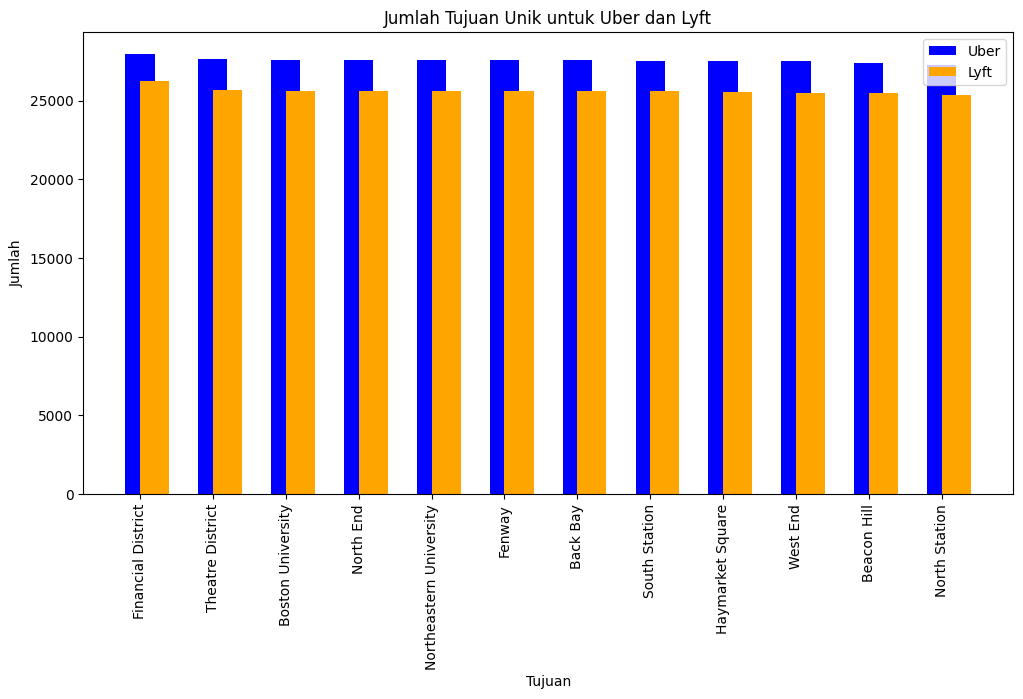

In [ ]:
# Filter data untuk Uber dan Lyft
uber_data = df[df['cab_type'] == 'Uber']
lyft_data = df[df['cab_type'] == 'Lyft']

# Menghitung jumlah tujuan unik untuk Uber dan Lyft
uber_sources = uber_data['source'].value_counts()
lyft_sources = lyft_data['source'].value_counts()

# Menyiapkan data untuk plot
tujuan = uber_sources.index  # Ambil nama tujuan dari salah satu data (bisa Uber atau Lyft)
jumlah_uber = uber_sources.values
jumlah_lyft = lyft_sources.values

# Membuat bar chart dengan warna yang berbeda
plt.figure(figsize=(12, 6))
width = 0.4
plt.bar(tujuan, jumlah_uber, width=width, label='Uber', color='blue', align='center')
plt.bar(tujuan, jumlah_lyft, width=width, label='Lyft', color='orange', align='edge')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah')
plt.title('Jumlah Tujuan Unik untuk Uber dan Lyft')
plt.xticks(rotation=90)
plt.legend()
plt.show()

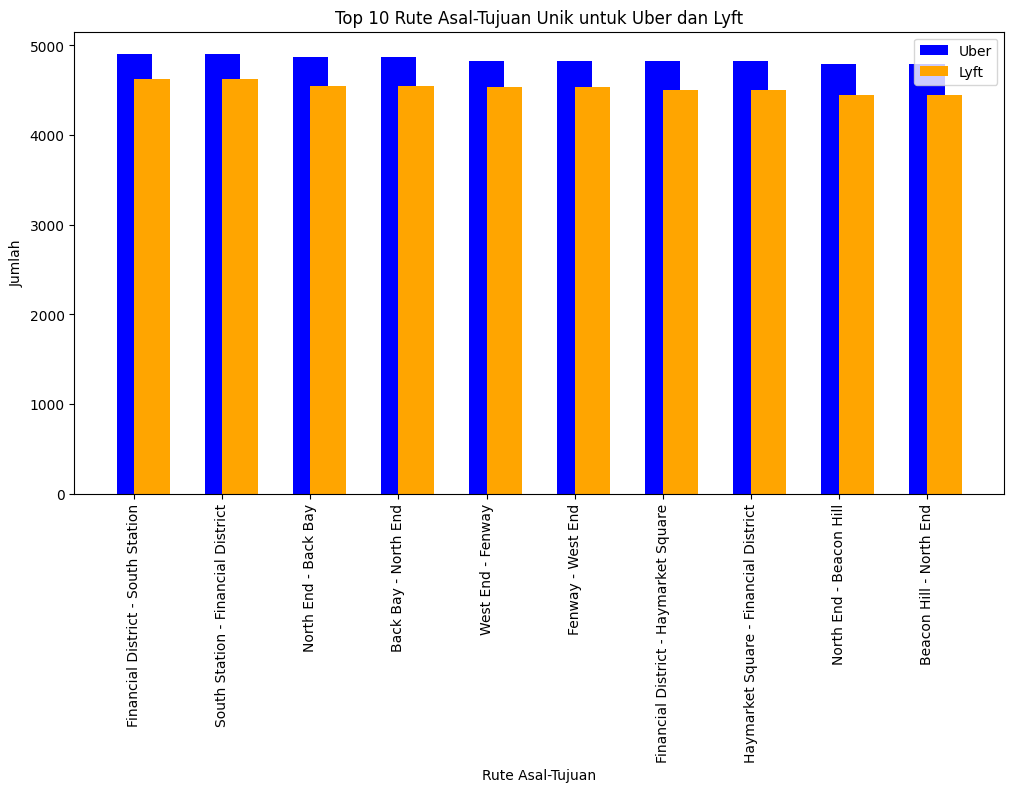

In [ ]:
# Filter data untuk Uber dan Lyft
uber_data = df[df['cab_type'] == 'Uber']
lyft_data = df[df['cab_type'] == 'Lyft']

# Menghitung jumlah rute asal-tujuan unik untuk Uber dan Lyft
uber_routes = (uber_data['source'] + ' - ' + uber_data['destination']).value_counts()
lyft_routes = (lyft_data['source'] + ' - ' + lyft_data['destination']).value_counts()

# Mengambil 10 data tertinggi
uber_top_routes = uber_routes.head(10)
lyft_top_routes = lyft_routes.head(10)

# Menyiapkan data untuk plot
routes = uber_top_routes.index
jumlah_uber = uber_top_routes.values
jumlah_lyft = lyft_top_routes.values

# Membuat bar chart dengan warna yang berbeda
plt.figure(figsize=(12, 6))
width = 0.4
plt.bar(routes, jumlah_uber, width=width, label='Uber', color='blue', align='center')
plt.bar(routes, jumlah_lyft, width=width, label='Lyft', color='orange', align='edge')
plt.xlabel('Rute Asal-Tujuan')
plt.ylabel('Jumlah')
plt.title('Top 10 Rute Asal-Tujuan Unik untuk Uber dan Lyft')
plt.xticks(rotation=90)
plt.legend()
plt.show()

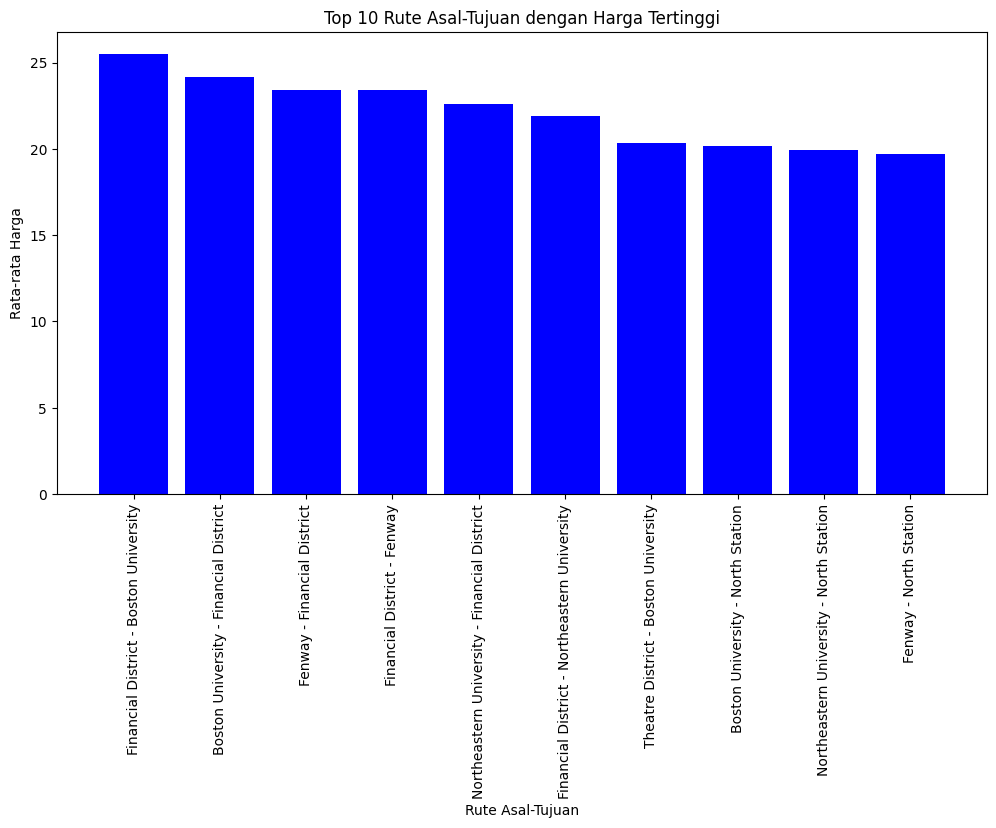

In [ ]:
# Mengelompokkan data berdasarkan rute asal-tujuan dan menghitung rata-rata harga untuk setiap rute
route_prices = df.groupby(['source', 'destination'])['price'].mean().sort_values(ascending=False).head(10)

# Reset index
route_prices = route_prices.reset_index()

# Menyiapkan data untuk plot
routes = route_prices['source'] + ' - ' + route_prices['destination']
prices = route_prices['price']

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(routes, prices, color='blue')
plt.xlabel('Rute Asal-Tujuan')
plt.ylabel('Rata-rata Harga')
plt.title('Top 10 Rute Asal-Tujuan dengan Harga Tertinggi')
plt.xticks(rotation=90)
plt.show()

Rute dengan harga rata-rata tertinggi yaitu dari Financial District ke Boston University dengan rata-rata 25 dolar

# 6. Data Preprocessing

## 6.1. Label Encoder

In [ ]:
#pisahkan df['name']

df_name = df['name']
df_name

0               Shared
1                  Lux
2                 Lyft
3         Lux Black XL
4              Lyft XL
              ...     
693065             WAV
693066          UberXL
693067           UberX
693069       Black SUV
693070        UberPool
Name: name, Length: 637976, dtype: object

In [ ]:
# le = LabelEncoder()

# df_category = df.select_dtypes(include=['object'])

# for kolom in df_category.columns:
#     df[kolom] = le.fit_transform(df_category[kolom])

# df

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df = df.copy()

df_category = new_df.select_dtypes(include=['object'])

label_mappings = {}  # Membuat kamus kosong untuk menyimpan label mappings

for kolom in df_category.columns:
    le.fit(df_category[kolom])
    new_df[kolom] = le.transform(df_category[kolom])

    if kolom in ['cab_type', 'source', 'destination', 'name']:
        print(f"kolom = {kolom}")
        label_mapping = {label: code for label, code in zip(le.classes_, le.transform(le.classes_))}
        label_mappings[kolom] = label_mapping  # Menambahkan label mapping ke kamus
        for label, code in label_mapping.items():
            print(f"label asli: {label} label encode: {code}")
        print()

new_df


kolom = source
label asli: Back Bay label encode: 0
label asli: Beacon Hill label encode: 1
label asli: Boston University label encode: 2
label asli: Fenway label encode: 3
label asli: Financial District label encode: 4
label asli: Haymarket Square label encode: 5
label asli: North End label encode: 6
label asli: North Station label encode: 7
label asli: Northeastern University label encode: 8
label asli: South Station label encode: 9
label asli: Theatre District label encode: 10
label asli: West End label encode: 11

kolom = destination
label asli: Back Bay label encode: 0
label asli: Beacon Hill label encode: 1
label asli: Boston University label encode: 2
label asli: Fenway label encode: 3
label asli: Financial District label encode: 4
label asli: Haymarket Square label encode: 5
label asli: North End label encode: 6
label asli: North Station label encode: 7
label asli: Northeastern University label encode: 8
label asli: South Station label encode: 9
label asli: Theatre District lab

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,165097,1.544953e+09,9,16,12,25351,0,5,7,0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,188776,1.543284e+09,2,27,11,961,0,5,7,0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,378853,1.543367e+09,1,28,11,2534,0,5,7,0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,485300,1.543554e+09,4,30,11,6988,0,5,7,0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,558249,1.543463e+09,3,29,11,4400,0,5,7,0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,132479,1.543708e+09,23,1,12,11456,0,11,6,1,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,242669,1.543708e+09,23,1,12,11456,0,11,6,1,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,247148,1.543708e+09,23,1,12,11456,0,11,6,1,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,285253,1.543708e+09,23,1,12,11456,0,11,6,1,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
label_mappings

{'source': {'Back Bay': 0,
  'Beacon Hill': 1,
  'Boston University': 2,
  'Fenway': 3,
  'Financial District': 4,
  'Haymarket Square': 5,
  'North End': 6,
  'North Station': 7,
  'Northeastern University': 8,
  'South Station': 9,
  'Theatre District': 10,
  'West End': 11},
 'destination': {'Back Bay': 0,
  'Beacon Hill': 1,
  'Boston University': 2,
  'Fenway': 3,
  'Financial District': 4,
  'Haymarket Square': 5,
  'North End': 6,
  'North Station': 7,
  'Northeastern University': 8,
  'South Station': 9,
  'Theatre District': 10,
  'West End': 11},
 'cab_type': {'Lyft': 0, 'Uber': 1},
 'name': {'Black': 0,
  'Black SUV': 1,
  'Lux': 2,
  'Lux Black': 3,
  'Lux Black XL': 4,
  'Lyft': 5,
  'Lyft XL': 6,
  'Shared': 7,
  'UberPool': 8,
  'UberX': 9,
  'UberXL': 10,
  'WAV': 11}}

In [ ]:
X = new_df.drop(['price'], axis=1)
y = new_df['price']
print(X.shape)
print(y.shape)

(637976, 56)
(637976,)


In [ ]:
# Misalkan df adalah DataFrame Anda
shared_rows = df[df['name'] == 'Shared'][['name', 'product_id']]

# Sekarang, shared_rows berisi semua baris di mana 'name' sama dengan 'Shared' beserta kolom 'product_id'
print(shared_rows)


          name product_id
0       Shared  lyft_line
8       Shared  lyft_line
22      Shared  lyft_line
32      Shared  lyft_line
44      Shared  lyft_line
...        ...        ...
693015  Shared  lyft_line
693019  Shared  lyft_line
693029  Shared  lyft_line
693038  Shared  lyft_line
693048  Shared  lyft_line

[51233 rows x 2 columns]


## 6.2. Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Contoh penggunaan SelectKBest dengan f_regression
selector = SelectKBest()  # Atur nilai K sesuai kebutuhan
X_new = selector.fit_transform(X, y)

In [ ]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Skor fitur dari yang tertinggi:")
print(sorted_feature_scores)

Skor fitur dari yang tertinggi:
                        Feature        Score
9                      cab_type  6829.430712
11                         name  5492.119077
10                   product_id  5182.421103
12                     distance  1442.361474
13             surge_multiplier  1220.766474
8                   destination    50.664470
7                        source    40.349546
20              precipIntensity     1.279052
38                  windBearing     1.141831
46           precipIntensityMax     1.129323
37                     pressure     1.123738
4                         month     1.088850
48               temperatureMin     1.067687
18                short_summary     1.066294
23                    windSpeed     1.063565
21            precipProbability     1.055485
3                           day     1.051190
5                      datetime     1.050710
1                     timestamp     1.042653
25                 windGustTime     1.038113
49           temperatur

Dari semua kolom, ditemukan 7 atribut dengan score tertinggi namun karena product_id itu sudah terwakilkan oleh name maka atribut yang dipakai hanya 6, dan atribut tersebut akan dipakai di proses training model

In [ ]:
best_feature = sorted_feature_scores[0:7]
best_feature = best_feature['Feature']
best_feature = best_feature[best_feature != 'product_id']
best_feature

9             cab_type
11                name
12            distance
13    surge_multiplier
8          destination
7               source
Name: Feature, dtype: object

In [ ]:
df_name = pd.get_dummies(df_name)
df_name

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1
693066,0,0,0,0,0,0,0,0,0,0,1,0
693067,0,0,0,0,0,0,0,0,0,1,0,0
693069,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menggabungkan dua DataFrame dengan mengabaikan kolom 'name'
X_feat = pd.concat([new_df[best_feature], df_name], axis=1)

# Menghapus kolom 'name' dari DataFrame yang telah digabungkan
X_feat = X_feat.drop(columns=['name'])

# Menampilkan DataFrame yang telah digabungkan dan kolom 'name' sudah dihapus
print(X_feat)

        cab_type  distance  surge_multiplier  destination  source  Black  \
0              0      0.44               1.0            7       5      0   
1              0      0.44               1.0            7       5      0   
2              0      0.44               1.0            7       5      0   
3              0      0.44               1.0            7       5      0   
4              0      0.44               1.0            7       5      0   
...          ...       ...               ...          ...     ...    ...   
693065         1      1.00               1.0            6      11      0   
693066         1      1.00               1.0            6      11      0   
693067         1      1.00               1.0            6      11      0   
693069         1      1.00               1.0            6      11      0   
693070         1      1.00               1.0            6      11      0   

        Black SUV  Lux  Lux Black  Lux Black XL  Lyft  Lyft XL  Shared  \
0            

In [ ]:
X_feat.dtypes

cab_type              int64
distance            float64
surge_multiplier    float64
destination           int64
source                int64
Black                 uint8
Black SUV             uint8
Lux                   uint8
Lux Black             uint8
Lux Black XL          uint8
Lyft                  uint8
Lyft XL               uint8
Shared                uint8
UberPool              uint8
UberX                 uint8
UberXL                uint8
WAV                   uint8
dtype: object

# 7. Modelling

Pada dataset yang telah diberikan, diketahui bahwa golongan data prediksi termasuk pada golongan data yang kontinu. Akibatnya pada dataset yang telah diberikan, metode pengujian pada training setnya akan menggunakan metode regresi linier

## 7.1. Train Test Split

In [ ]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size = 0.3, random_state = 42)

In [ ]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (446583, 17)
Dimensi target data train : (446583,)
Dimensi feature data test : (191393, 17)
Dimensi target data test : (191393,)


## 7.2. Train Model

In [ ]:
lr_i = LinearRegression()

In [ ]:
model = lr_i.fit(X_train, y_train)

## 7.3. Evaluasi Model

Linear Regression train R Squared  =  0.9273041547393697
Linear Regression test R Squared   =  0.9277076087637127
Linear Regression test RMSE        =  2.511298565659133


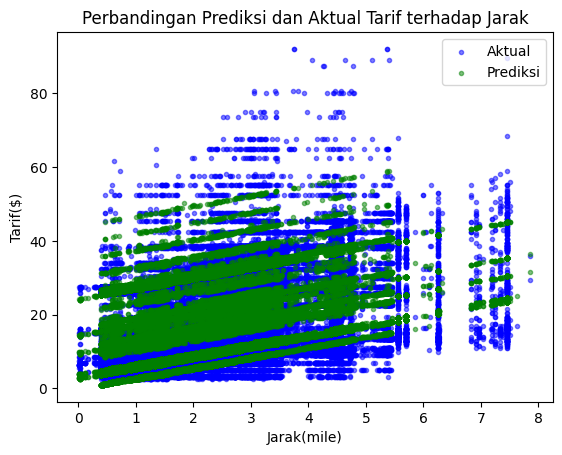

In [ ]:
y_pred = model.predict(X_test)

## R-squared data train
lr_train_r2 = lr_i.score(X_train,y_train)
## R-squared data test
lr_test_r2 = lr_i.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train_r2)
print('Linear Regression test R Squared   = ', lr_test_r2)

## Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse)

x_axis = X_test.distance

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'g', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Tarif($)')
plt.title("Perbandingan Prediksi dan Aktual Tarif terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

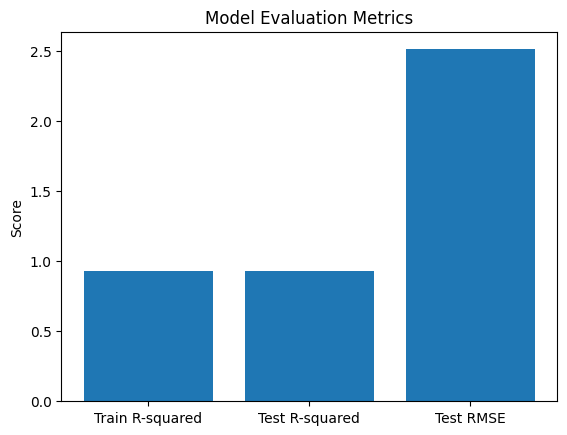

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Train R-squared', 'Test R-squared', 'Test RMSE']
values = [lr_train_r2, lr_test_r2, lr_rmse]

plt.bar(labels, values)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()


Kesimpulan dari hasil evaluasi model regresi linear adalah sebagai berikut:

R-squared pada Data Pelatihan (Train R-squared):
Nilai R-squared pada data pelatihan adalah sekitar 0.9273.
Ini menunjukkan bahwa model regresi linear mampu menjelaskan sekitar 92.73% variasi dalam data pelatihan. Model ini memiliki kemampuan yang baik untuk cocok dengan data pelatihan.

R-squared pada Data Uji (Test R-squared):
Nilai R-squared pada data uji adalah sekitar 0.9277.
Ini menunjukkan bahwa model regresi linear juga mampu menjelaskan sekitar 92.77% variasi dalam data uji yang tidak pernah dilihat sebelumnya. Ini adalah indikasi yang baik bahwa model dapat menggeneralisasi dengan baik ke data baru.

Root Mean Squared Error pada Data Uji (Test RMSE):
Nilai Root Mean Squared Error (RMSE) pada data uji adalah sekitar 2.5113.
RMSE adalah metrik yang mengukur tingkat kesalahan prediksi model. Semakin rendah RMSE, semakin baik kualitas prediksi. Nilai RMSE yang relatif rendah menunjukkan bahwa model Anda memberikan perkiraan yang cukup akurat.

# 8. Model Inference

Untuk menguji keakuratan model, dilakukan model inference untuk menguji model dengan data di luar data yang tersedia.

In [ ]:
X_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          637976 non-null  int64  
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   destination       637976 non-null  int64  
 4   source            637976 non-null  int64  
 5   Black             637976 non-null  uint8  
 6   Black SUV         637976 non-null  uint8  
 7   Lux               637976 non-null  uint8  
 8   Lux Black         637976 non-null  uint8  
 9   Lux Black XL      637976 non-null  uint8  
 10  Lyft              637976 non-null  uint8  
 11  Lyft XL           637976 non-null  uint8  
 12  Shared            637976 non-null  uint8  
 13  UberPool          637976 non-null  uint8  
 14  UberX             637976 non-null  uint8  
 15  UberXL            637976 non-null  uint8  
 16  WAV               63

In [ ]:
def choose_option(options, label):
    print(f"Pilih {label}:")
    for key, value in options.items():
        print(f"{value}. {key}")

    selected_option = int(input("Pilihanmu: "))
    print()
    if selected_option in options.values():
        return selected_option
    else:
        print("Pilihan tidak valid")
        return None

cab_type = choose_option(label_mappings['cab_type'], 'tipe kendaraan')
name = choose_option(label_mappings['name'], 'jenis layanan')
source = choose_option(label_mappings['source'], 'alamat asal')
destination = choose_option(label_mappings['destination'], 'alamat tujuan')

if None in [cab_type, name, source, destination]:
    print("Terdapat pilihan yang tidak valid. Program berakhir.")
else:
    distance = float(input('Masukan jarak tempuh:'))
    surger_multiplier = float(input('Masukan pengganda lonjakan: '))

    val = [cab_type, distance, surger_multiplier, destination, source]

    for i in range(len(label_mappings['name'])):
        if name == list(label_mappings['name'].values())[i]:
            val.append(1.0)
        else:
            val.append(0.0)

    print(val)

    predict = model.predict([val])
    print('=====================')

    print("Estimasi harga:", round(predict[0], 2))


Pilih tipe kendaraan:
0. Lyft
1. Uber
Pilihanmu: 1

Pilih jenis layanan:
0. Black
1. Black SUV
2. Lux
3. Lux Black
4. Lux Black XL
5. Lyft
6. Lyft XL
7. Shared
8. UberPool
9. UberX
10. UberXL
11. WAV
Pilihanmu: 0

Pilih alamat asal:
0. Back Bay
1. Beacon Hill
2. Boston University
3. Fenway
4. Financial District
5. Haymarket Square
6. North End
7. North Station
8. Northeastern University
9. South Station
10. Theatre District
11. West End
Pilihanmu: 7

Pilih alamat tujuan:
0. Back Bay
1. Beacon Hill
2. Boston University
3. Fenway
4. Financial District
5. Haymarket Square
6. North End
7. North Station
8. Northeastern University
9. South Station
10. Theatre District
11. West End
Pilihanmu: 9

Masukan jarak tempuh:2.17
Masukan pengganda lonjakan: 1
[1, 2.17, 1.0, 9, 7, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Estimasi harga: 20.55


Berdasarkan model inference, ketika diinputkan data seperti berikut:

*   cab_type = uber
*   name = black
*   source = North Station
*   destination = South Station
*   distance = 2.17
*   surger_multiplier = 1

hasil prediksinya mendapatkan estimasi harga 20.55 dolar










# 9. Kesimpulan

* Uber memiliki 51.8% dari total dataset, sedangkan Lyft memiliki 48.2%.
* Distribusi harga/tarif menunjukkan bahwa puncak harga untuk Uber dan Lyft terletak di bawah $20, dengan banyak perjalanan dalam kisaran ini.
* Quartile pertama (Q1) dan median waktu penggunaan (jam) sama antara Uber dan Lyft.
* Terdapat banyak data outlier dengan harga yang jauh di atas rata-rata.
* Distribusi jarak perjalanan menunjukkan puncak terletak pada jarak 1-2 mil.
* Waktu penggunaan tertinggi untuk Uber dan Lyft terjadi pada tengah malam (00.00), sementara penggunaan terendah terjadi pada pukul 8 pagi.
* Rute dari Financial District ke Boston University memiliki harga rata-rata tertinggi, yaitu 25 dolar.
* Pada tahap seleksi fitur didapatkan 6 fitur yang paling berpengaruh terhadap model, fitur tersebut adalah cab_type, source, destination, name, distance dan surger_multiplier
* Dataset dibagi dengan porsi 70% untuk train dan 30% untuk tes
* Model regresi linear memiliki kemampuan yang baik dalam menjelaskan data pelatihan, dengan R-squared sekitar 92.73%.
* Model ini juga mampu menggeneralisasi dengan baik ke data uji yang tidak pernah dilihat sebelumnya, dengan R-squared sekitar 92.77%.
* Root Mean Squared Error (RMSE) pada data uji adalah sekitar 2.5113, yang menunjukkan bahwa model memberikan perkiraan yang cukup akurat.
* Berdasarkan model inference, untuk perjalanan dengan atribut seperti cab_type Uber, jenis mobil Black, rute dari North Station ke South Station dengan jarak 2.17 mil, dan tanpa adanya peningkatan tarif (surge_multiplier = 1), perkiraan harga adalah sekitar 20.55 dolar.






